In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams["font.family"] = "arial"

def normalize_rgb(dictionary):
    for color in dictionary.keys():
        r, g, b = dictionary[color]
        dictionary[color] = (r / 255., g / 255., b / 255.)
    return dictionary

tableau10 = {
    'blue': (78, 121, 167), 'orange': (242, 142, 43), 'red': (225, 87, 89),
    'cyan': (118, 183, 178), 'green': (89, 161, 79), 'yellow': (237, 201, 72),
    'purple': (176, 122, 161), 'pink': (225, 157, 167), 'brown': (156, 117, 95),
    'grey': (186, 176, 172), 'white': (240, 240, 240)
}

tableau10 = normalize_rgb(tableau10)

def remove_spines(ax):
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    return ax

In [3]:
save_figures = True
limit_to_GRCh38 = False

## Load data

In [4]:
file = 'hgvs4variation.txt'
with open(file, 'r') as f:
    last_comment = None
    for line in f:
        if line.startswith('#'):
            last_comment = line
        else:
            break  # stop once the actual data begins

columns = last_comment.lstrip("#").strip().split("\t")

df = pd.read_csv(
    "hgvs4variation.txt",
    sep="\t",
    comment="#",
    names=columns,
    header=None,
    #nrows=10,
    usecols=['VariationID', 'AlleleID', 'NucleotideExpression', 'ProteinExpression', 'Assembly']
)

df.head()

,VariationID,AlleleID,Assembly,NucleotideExpression,ProteinExpression
0,25,15064,GRCh38,NC_000020.11:g.25383511_25397601del14091insGG,-
1,25,15064,GRCh38,NC_000020.11:g.25383511_25397600delinsG,-
2,25,15064,GRCh37,NC_000020.10:g.25364147_25378237delinsGG,-
3,25,15064,GRCh37,NC_000020.10:g.25364147_25378237del14091insGG,-
4,116,15155,GRCh37,NC_000013.10:g.29233226del,-


In [5]:
df['Assembly'].unique()

array(['GRCh38', 'GRCh37', 'na', 'NCBI36'], dtype=object)

In [6]:
print(df['VariationID'].unique().shape, df['AlleleID'].unique().shape)

(3569416,) (3568536,)


In [7]:
if limit_to_GRCh38:
    df = df[df['Assembly'].eq('GRCh38')]

In [8]:
print(df['VariationID'].unique().shape, df['AlleleID'].unique().shape)

(3569416,) (3568536,)


In [9]:
df['Assembly'].unique()

array(['GRCh38', 'GRCh37', 'na', 'NCBI36'], dtype=object)

## Representative examples  

In [10]:
# URL: https://www.ncbi.nlm.nih.gov/clinvar/variation/376130/
variation_id = 376130
example = df[df['VariationID'].eq(variation_id)]
print(example.shape)
example

(7, 5)


,VariationID,AlleleID,Assembly,NucleotideExpression,ProteinExpression
22738775,376130,363009,na,NM_004958.3:c.4379T>C,-
22738776,376130,363009,GRCh37,NC_000001.10:g.11217299A>G,-
22738777,376130,363009,GRCh38,NC_000001.11:g.11157242A>G,-
22738778,376130,363009,na,NG_033239.1:g.110310T>C,-
22738779,376130,363009,na,NM_004958.4:c.4379T>C,NP_004949.1:p.Leu1460Pro
22738780,376130,363009,na,LRG_734t1:c.4379T>C,-
22738781,376130,363009,na,LRG_734:g.110310T>C,-


In [11]:
# URL: https://www.ncbi.nlm.nih.gov/clinvar/variation/15333/
# Download includes NM_000518.4:c.20A>T, outdated reference? Why isn't this showing on the website?
variation_id = 15333
example = df[df['VariationID'].eq(variation_id)]
print(example.shape)
example

(11, 5)


,VariationID,AlleleID,Assembly,NucleotideExpression,ProteinExpression
17692939,15333,30372,na,LRG_1232:g.5070A>T,-
17692940,15333,30372,na,-,P68871:p.Glu7Val
17692941,15333,30372,na,LRG_1232t1:c.20A>T,LRG_1232p1:p.Glu7Val
17692942,15333,30372,na,NG_042296.1:g.533T>A,-
17692943,15333,30372,na,NM_000518.4:c.20A>T,-
17692944,15333,30372,na,NG_046672.1:g.4937T>A,-
17692945,15333,30372,na,NG_059281.1:g.5070A>T,-
17692946,15333,30372,na,NM_000518.5:c.20A>T,NP_000509.1:p.Glu7Val
17692947,15333,30372,GRCh38,NC_000011.10:g.5227002T>A,-
17692948,15333,30372,GRCh37,NC_000011.9:g.5248232T>A,-


In [12]:
print(df['VariationID'].unique().shape, df['AlleleID'].unique().shape)

(3569416,) (3568536,)


## Per Allele ID
Information on Variation ID and Allele ID in ClinVar can be found [here](https://www.ncbi.nlm.nih.gov/clinvar/docs/identifiers/). This plot can be modified by changing the groupby column.

**This section will take several minutes to execute**. 

In [13]:
groupby_column = 'AlleleID'

results = []
for label, group in df.groupby(groupby_column):
    nucleotide_expressions = group[~group['NucleotideExpression'].eq('-')].shape[0]
    protein_expressions = group[~group['ProteinExpression'].eq('-')].shape[0]
    record = {
        groupby_column: label,
        'nucleotide_expressions': nucleotide_expressions,
        'protein_expressions': protein_expressions,
        'total': nucleotide_expressions + protein_expressions
    }
    results.append(record)
results = pd.DataFrame(results)

In [14]:
results

,AlleleID,nucleotide_expressions,protein_expressions,total
0,-1,1105,0,1105
1,15041,10,2,12
2,15042,9,3,12
3,15043,5,2,7
4,15044,7,1,8
...,...,...,...,...
3568531,4022046,25,20,45
3568532,4022047,25,10,35
3568533,4022048,10,4,14
3568534,4022049,25,18,43


In [15]:
# I think that AlleleID -1 must be a bug or placeholder value?
results_cleaned = results[~results[groupby_column].eq(-1)]
results_cleaned.sort_values(by='total', ascending=False)

,AlleleID,nucleotide_expressions,protein_expressions,total
22123,46200,386,373,759
16111,32716,385,372,757
37461,70022,384,371,755
37229,69784,383,372,755
22102,46179,383,371,754
...,...,...,...,...
1698936,1945833,1,0,1
319754,436440,1,0,1
1698935,1945832,1,0,1
319753,436439,1,0,1


In [16]:
results_cleaned

,AlleleID,nucleotide_expressions,protein_expressions,total
1,15041,10,2,12
2,15042,9,3,12
3,15043,5,2,7
4,15044,7,1,8
5,15045,6,2,8
...,...,...,...,...
3568531,4022046,25,20,45
3568532,4022047,25,10,35
3568533,4022048,10,4,14
3568534,4022049,25,18,43


In [17]:
results_cleaned['total'].gt(100).value_counts()

total
False    3544314
True       24221
Name: count, dtype: int64

In [18]:
results_cleaned['total'].gt(100).value_counts().divide(results_cleaned.shape[0]) * 100

total
False    99.321262
True      0.678738
Name: count, dtype: float64

In [19]:
allele_id_large_example = results_cleaned.loc[results_cleaned['total'].eq(150), :].iloc[0, :].loc['AlleleID']
allele_id_large_example

np.int64(188359)

In [20]:
example = df[df['AlleleID'].eq(allele_id_large_example)]
print(example.shape[0])
example

79


,VariationID,AlleleID,Assembly,NucleotideExpression,ProteinExpression
1684137,190589,188359,na,LRG_327:g.480441CAC[4],-
1684138,190589,188359,na,NM_001148.4:c.2472_2474del,-
1684139,190589,188359,na,LRG_327t1:c.2472_2474del,-
1684140,190589,188359,na,NM_001386162.1:c.2373CAC[4],NP_001373091.1:p.Thr797del
1684141,190589,188359,na,NM_001148.4:c.2472_2474delCAC,-
...,...,...,...,...,...
1684211,190589,188359,na,NM_001386156.1:c.2298CAC[4],NP_001373085.1:p.Thr772del
1684212,190589,188359,na,NM_001386157.1:c.2175CAC[4],NP_001373086.1:p.Thr731del
1684213,190589,188359,na,NM_001386158.1:c.2076CAC[4],NP_001373087.1:p.Thr698del
1684214,190589,188359,na,NM_001386160.1:c.2418CAC[4],NP_001373089.1:p.Thr812del


In [21]:
data = results_cleaned['total']
description = data.describe()
description

count    3.568535e+06
mean     1.453847e+01
std      4.038431e+01
min      1.000000e+00
25%      6.000000e+00
50%      9.000000e+00
75%      1.300000e+01
max      7.590000e+02
Name: total, dtype: float64

In [22]:
description.loc['min']

np.float64(1.0)

In [23]:
description.loc['max']

np.float64(759.0)

In [24]:
description.loc['mean']

np.float64(14.538474752244268)

In [25]:
description.loc['50%']

np.float64(9.0)

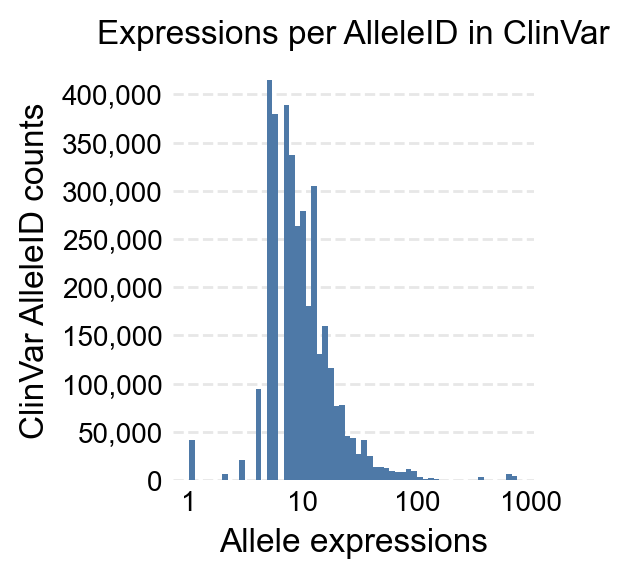

In [33]:
filename = f"clinvar-expressions-per-{groupby_column}"
save_figures = True

x = data.to_numpy()
xmin = max(1, x.min())                 
xmax = x.max()
bins = np.logspace(np.log10(xmin), np.log10(xmax), 60)

fig, ax = plt.subplots(figsize=(3, 3))
ax.hist(x, bins=bins, zorder=2, color=tableau10['blue'])

ax.set_xscale('log')
ax.set_xlabel(f'Allele expressions', fontsize=12)
ax.set_ylabel(f'ClinVar {groupby_column} counts', fontsize=12)
ax.set_title(f"Expressions per {groupby_column} in ClinVar", fontsize=12)
ax.tick_params(axis='both', which='both', length=0)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):d}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

ax.set_axisbelow(True)
ax.grid(True, which='both', axis='y', alpha=0.3, linestyle='--', linewidth=1)

remove_spines(ax)
plt.tight_layout()

if save_figures:
    for suffix in ['png', 'svg']:
        outname = f'{filename}.{suffix}'
        plt.savefig(outname, format=suffix, bbox_inches='tight', dpi=300)

plt.show()